### data source: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Read the csv file
data = pd.read_csv("Resources/credit_risk_dataset.csv")

# Display the dataframe
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [38]:
# Make a copy of the dataframe
df = data.copy()

In [4]:
# Display summary information about the DataFrame, including column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
# Count the number of missing values in each column of the DataFrame
df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
# Remove rows with any missing values from the DataFrame
df = df.dropna(how='any')

# Count the number of missing values in each column of the DataFrame after removing rows with missing values to ensure that no missing values remain
df.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [7]:
# Rename the columns
df1 = df.rename(columns={'person_age': 'age', 
                            'person_income': 'income', 
                            'person_home_ownership': 'home_ownership', 
                            'person_emp_length': 'employment_duration', 
                            'loan_intent': 'loan_purpose', 
                            'loan_grade': 'loan_grade',
                            'loan_amnt': 'loan_amount', 
                            'loan_int_rate': 'int_rate', 
                            'loan_status': 'loan_status', 
                            'loan_percent_income': 'loan_income_pct', 
                            'cb_person_default_on_file': 'past_default_status',
                            'cb_person_cred_hist_length': 'credit_history_length'})

# Display the first few rows of the DataFrame
df1.head()


,age,income,home_ownership,employment_duration,loan_purpose,loan_grade,loan_amount,int_rate,loan_status,loan_income_pct,past_default_status,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
# Display summary statistics for the DataFrame

df1.describe()



,age,income,employment_duration,loan_amount,int_rate,loan_status,loan_income_pct,credit_history_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


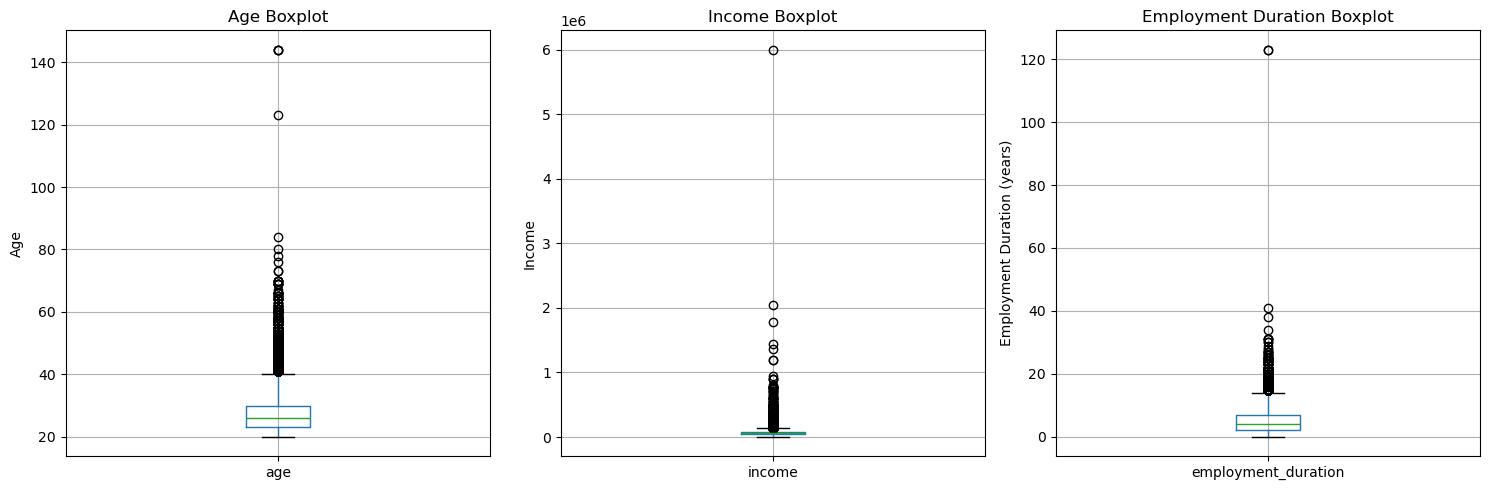

In [9]:
# Create a figure with 3 subplots in 1 row to detect outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create boxplots
df1.boxplot(column='age', ax=axes[0])
axes[0].set_title('Age Boxplot')
axes[0].set_ylabel('Age')

df1.boxplot(column='income', ax=axes[1])
axes[1].set_title('Income Boxplot')
axes[1].set_ylabel('Income')

df1.boxplot(column='employment_duration', ax=axes[2])
axes[2].set_title('Employment Duration Boxplot')
axes[2].set_ylabel('Employment Duration (years)')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [10]:
# Remove the outliers for the age and employment_duration columns
df1 = df1[(df1['age'] < 100) & (df1['employment_duration'] < 50)]

# Display summary statistics for the DataFrame
df1.describe()


,age,income,employment_duration,loan_amount,int_rate,loan_status,loan_income_pct,credit_history_length
count,28632.000000,2.863200e+04,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000
mean,27.712140,6.642651e+04,4.780316,9655.331447,11.039701,0.216611,0.169489,5.793553
std,6.171989,5.154746e+04,4.035616,6327.798706,3.229409,0.411942,0.106361,4.037133
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
data_clean = df1.to_csv('Resources/data_clean.csv', index=False)

In [12]:
df1.head()

,age,income,home_ownership,employment_duration,loan_purpose,loan_grade,loan_amount,int_rate,loan_status,loan_income_pct,past_default_status,credit_history_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


LOGISTIC REGRESSION MODEL- PREDICTING LOAN ELIGIBILITY

In [13]:
#Converting categorical columns to numerical data

categorical_cols = ['home_ownership', 'loan_purpose', 'loan_grade', 'past_default_status']

# Using get dummies function to convert into numerical values
df1 = pd.get_dummies(df1, columns=categorical_cols, drop_first=False)


In [14]:
#Separating the feature (X) from target y
y = df1["loan_status"]
X = df1.drop(columns="loan_status")

In [15]:
df1.head()

,age,income,employment_duration,loan_amount,int_rate,loan_status,loan_income_pct,credit_history_length,home_ownership_MORTGAGE,home_ownership_OTHER,...,loan_purpose_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,past_default_status_N,past_default_status_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,2,False,False,...,True,True,False,False,False,False,False,False,True,False


In [16]:
#Splitting our data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(21474, 26)

In [17]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#Creating a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [19]:
#fit(train) or model using the training data

classifier.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [20]:
#Scoring the model using the test data
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8690043773866071
Testing Data Score: 0.8665828443699357


In [21]:
#Making predictions
predictions = classifier.predict(X_test_scaled)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


In [22]:
#Calculating the Accuracy score

from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.8665828443699357

In [23]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[5348,  259],
       [ 696,  855]], dtype=int64)

In [24]:
#Classification report

from sklearn.metrics import classification_report
target_names = ["Loan Status 0", "Loan Status 1"]
print(classification_report(y_test, predictions, target_names=target_names))

               precision    recall  f1-score   support

Loan Status 0       0.88      0.95      0.92      5607
Loan Status 1       0.77      0.55      0.64      1551

     accuracy                           0.87      7158
    macro avg       0.83      0.75      0.78      7158
 weighted avg       0.86      0.87      0.86      7158



In [25]:
df1.head()

,age,income,employment_duration,loan_amount,int_rate,loan_status,loan_income_pct,credit_history_length,home_ownership_MORTGAGE,home_ownership_OTHER,...,loan_purpose_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,past_default_status_N,past_default_status_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,0.57,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,False,False,False,True,False,False,False,False,False,True
5,21,9900,2.0,2500,7.14,1,0.25,2,False,False,...,True,True,False,False,False,False,False,False,True,False


LINEAR REGRESSION MODEL- PREDICTING INTEREST RATE

In [26]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
#Separating the feature (X) from target y
y = df1["int_rate"]
X = df1.drop(columns="int_rate")

In [28]:
#Splitting our data into training and testing.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)                                         

X_train.shape


(21474, 26)

In [29]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
X_train_scaled.shape

(21474, 26)

In [31]:
#Creating a linear regression model
model = LinearRegression()

In [32]:
#fit(train) or model using the training data

model.fit(X_train_scaled, y_train)

LinearRegression()

In [33]:
#Making predictions
predicted_y_values = model.predict(X_train_scaled)


In [34]:
# Compute metrics for the linear regression model: score, r2, mse, rmse, std
score = model.score(X_train_scaled, y_train)  # R² score
r2 = r2_score(y_train, predicted_y_values)
mse = mean_squared_error(y_train, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y_train)

# Print relevant metrics.
print(f"The score (R²) is {score}.")
print(f"The r² is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score (R²) is 0.902746688648907.
The r² is 0.902746688648907.
The mean squared error is 1.0105876581652549.
The root mean squared error is 1.0052798904609874.
The standard deviation is 3.2235528610965947.
